In [ ]:
from google.colab import files
uploaded = files.upload()

In [22]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from gensim.models.coherencemodel import CoherenceModel


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/medium.csv")

In [8]:
df.head()

,Unnamed: 0,subTitle,text,title,index
0,0,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",0
1,1,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",1
2,2,A major private IT company implements blockcha...,"Private Business, Government and Blockchain\n\...","Private Business, Government and Blockchain",2
3,3,Introduction,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),3
4,4,Introduction,EPQ draft 1 (4844 words)\nhttps://upload.wikim...,EPQ draft 1 (4844 words),4


In [24]:
sub_tit= []
for i in df["subTitle"]:
  sub_tit.append(str(i))

In [17]:
text = []
for i in df["text"]:
  text.append(i)

In [18]:
title = []
for i in df["title"]:
  title.append(i)

In [25]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = sub_tit
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model


In [ ]:
x_sub = []
y_sub = []
for i in range(21, 31):
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=i, workers=4, chunksize=20, passes=3, batch=True, alpha='symmetric',
                  eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=5,
                  gamma_threshold=0.01, random_state=12)
  top5_ = lda.print_topics(num_topics=8, num_words=10)
  x_sub.append(i)
  c = 0
  for i in top5_:

    c += 1
    print("Topic "+str(c))
    print(i)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

  y_sub.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())


In [34]:
x = [*(range(4,21))]
print(y_sub)

[0.3179209747052794, 0.28486279549812327, 0.26807920599412555, 0.2594361924632784, 0.30056510727270147, 0.28985547285070035, 0.27989292206213445, 0.3346135413802189, 0.2988674693539782, 0.31860525614863267, 0.3436140391182839, 0.3304467381394789, 0.32252945713559694, 0.323218640139772, 0.3029808214235524, 0.34716249429105056, 0.3086092607183908]


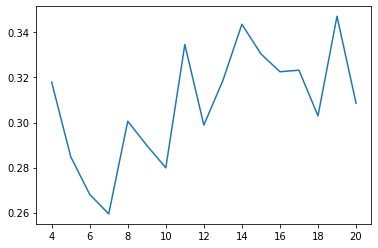

In [35]:
import matplotlib.pyplot as plt
plt.plot(x, y_sub)
plt.show()

In [36]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=5e2b48d8a7c9d98477e64f924da775851e4d94cfbaa7c6ab88972a33a933f84e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [38]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.021841  0.003509       1        1  11.010170
11     0.020282  0.002399       2        1  10.107933
8      0.018386 -0.017307       3        1   9.758716
3      0.011511  0.007023       4        1   7.371873
4      0.014303  0.000231       5        1   7.207554
12     0.003992 -0.000966       6        1   6.512383
17     0.010012  0.005018       7        1   6.208036
18    -0.002242  0.016348       8        1   4.997761
14     0.000646 -0.014259       9        1   4.558169
15     0.000266  0.002497      10        1   4.376413
9     -0.005697 -0.006136      11        1   4.367265
10    -0.001924  0.002554      12        1   3.833981
5      0.001524  0.005005      13        1   3.693964
1     -0.005242  0.002225      14        1   3.256555
2     -0.007860 -0.007949      15        1   2.779805
19    -0.005398  0.003646      16        1   2.762271
16    -0.012883 -0.000722      17        1   2.717872
7     -0.017629 -0.007528      18        1   1.754374
6     -0.016845  0.001580      19        1   1.477135
0     -0.027040  0.002833      20        1   1.247771, topic_info=          Term         Freq        Total Category  logprob  loglift
436        nan   274.000000   274.000000  Default  30.0000  30.0000
15        data  1424.000000  1424.000000  Default  29.0000  29.0000
53       learn  1115.000000  1115.000000  Default  28.0000  28.0000
45          ai  1201.000000  1201.000000  Default  27.0000  27.0000
179       year   458.000000   458.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
11   technolog     2.678520   611.495843  Topic20  -6.6601  -1.0468
196    network     2.131903   192.135184  Topic20  -6.8883  -0.1174
53       learn     2.451062  1115.305674  Topic20  -6.7488  -1.7366
15        data     2.387565  1424.868866  Topic20  -6.7751  -2.0077
518     articl     2.182035   316.626666  Topic20  -6.8651  -0.5937

[1457 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
845       1  0.159040    000
845       2  0.190848    000
845       3  0.111328    000
845       4  0.031808    000
845       5  0.047712    000
...     ...       ...    ...
6280      6  0.076910  zheng
6280      7  0.076910  zheng
6280      8  0.076910  zheng
6280     11  0.076910  zheng
6280     20  0.076910  zheng

[12784 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 12, 9, 4, 5, 13, 18, 19, 15, 16, 10, 11, 6, 2, 3, 20, 17, 8, 7, 1])